## Objective:
* Test the null hypothesis of Green winning the election with the smaller polling data set
* Test the null hypothesis of Brown winning the election with the larger polling data set

In [22]:
# Standard imports
import math
import io

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.stats
import scipy.optimize
import scipy.spatial

In [2]:
poll = pd.read_csv('poll.csv')

In [3]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

Here, the null hypothesis is that Green wins or ties the election. The True Brown fraction would be 0.5 or less. We need to find out whether a Brown proportion of 0.511 is an extreme result if the null hypothesis holds. So we compute the sampling distribution of the proportion and get a true Brown fraction of 0.5. If it's lower than the P value will be even lower. 

In [10]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [11]:
dist = pd.DataFrame({'Brown': [sample(0.5, 1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

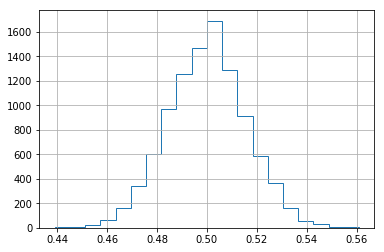

In [12]:
dist.Brown.hist(histtype='step', bins=20)

In [13]:
100 - scipy.stats.percentileofscore(dist.Brown, 0.511)

24.114999999999995

We see that the corresponding P value is 24%. Not enough to reject the null hypothesis that Green ties or wins. With the larger sample, it makes more sense to set the null hypothesis to Brown winning or tying since Green seems to have the majority. 

In [14]:
largerpoll = pd.read_csv('poll-larger.csv')

In [15]:
largerpoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [18]:
dist = pd.DataFrame({'Green': [sample(0.50, 10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

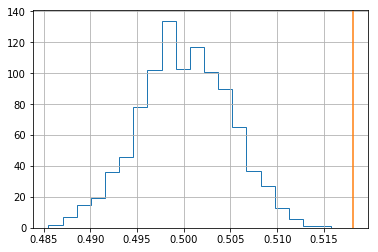

In [23]:
dist.Green.hist(histtype='step', bins=20)
plt.axvline(0.5181, c='C1')

Here, the value is so extreme that it's not even included in the sampling distribution. We conclude that the P value for rejecting the null hypothesis that Brown wins or ties is 1/1000 or less.